# Estymator jądrowy gęstości

Estymator jądrowy gęstości lub jądrowy estymator gęstości to rodzaj estymatora nieparametrycznego, przeznaczony do wyznaczania gęstości <b> rozkładu zmiennej losowej</b> (my na razie myślimy o rozkładzie punktów), na podstawie uzyskanej próby, czyli wartości jakie badana zmienna przyjęła w trakcie dotychczasowych pomiarów.

Niech dany będzie $d$-wymiarowy zbiór danych $X$. Jego estymator jądrowy
$$ 
\hat{f} : \mathbb{R}^d \to [0,\infty) 
$$
wyznacza się w oparciu o wartości $n$-elementowej próby losowej
$
x_{1},x_{2},...,x_{n}
$
w swej podstawowej formie jest on definiowany wzorem:
$$ 
\hat{f}(x) = \frac{1}{nh^d}\sum_{i=1}^{n} K\left(\frac{x-x_i}{h}\right)\ ,
$$
gdzie mierzalna, symetryczna względem zera oraz posiadająca w tym punkcie słabe maksimum globalne funkcja: 
$$ 
K : \mathbb{R}^d \to [0,\infty)
$$ 
spełnia warunek $ \int_{\mathbb{R}^n}{K(x)dx}=1$ i nazywana jest jądrem, natomiast dodatni współczynnik $h$ określa się mianem parametru wygładzania.


Najefektywniejszym w sensie kryterium błędu średniokwadratowego jest tak zwane jądro Epanecznikowa:
$$
K(x) =
 \begin{cases}
 \frac{3}{4}(1-x^2) & \mbox{dla } x \in [-1,1]\\
 0 & \mbox{dla } x\in(-\infty,-1)\cup(1,\infty)
 \end{cases}.
$$
Można też używać gęstości rozkładu normalnego.

https://pl.wikipedia.org/wiki/Estymator_j\%C4\%85drowy_g\%C4\%99sto\%C5\%9Bci



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# plotNorm
Poniższa funkcja rysuje jądro araz do tabliccy <tt>xcum</tt>, <tt>ycum</tt> dodaje wartości estymowanej funkcji gestości.

In [2]:
def plotNorm(pos, sd, xcum, ycum):
    ''' Plot individual curves '''
    
    x = np.arange(pos-3*sd, pos+3*sd, 0.1)
    nd = stats.norm(pos, sd)
    y = nd.pdf(x)
    plt.plot(x,y/10, 'r--')
    
    # Cumulative curve -> skumulowana krzywa?
    xcr = np.round(xcum*10)
    xir = np.round(x*10)
    for ii in range(len(xir)):
        ycum[xcr==xir[ii]] += y[ii]
    return ycum

Wygenerujmy prosty zbiór danych, narysujmy histogram oraz wyestymowaną gęstość.

[-2.1 -1.3 -0.4  1.9  5.1  6.2]


C:\Users\Edyta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


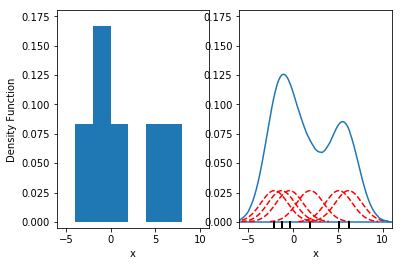

In [16]:
# Generate dummy data
data = np.array([-2.1, -1.3, -0.4, 1.9, 5.1, 6.2])
print(data)

# Define the two plots
fig, ax = plt.subplots(1,2)
ax[0].hist(data, bins=6, range=[-4, 8], normed=True)
ax[0].set_xlim(-6, 11)
ax[0].set_ylim(-0.005, 0.18)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density Function')
# Prepare cumulative arrays
xcum = np.arange(-6, 11, 0.1)
ycum = np.zeros_like(xcum)

# print('xcum: ', xcum)
# print('ycum: ', ycum)

# Width of the individual Gaussians
var = 2.25
sd = np.sqrt(var)

# Plot individual Gaussians
ax[1].set_xlim(-6, 11)
ax[1].set_ylim(-0.005, 0.18)
ax[1].set_xlabel('x')
ax[1].axhline(0)

for ii in range(len(data)):
    ax[1].plot([data,data], [0, -0.005], 'k')    # ???????????????????????????????????
    ycum = plotNorm(data[ii], sd, xcum, ycum)

    # Plot cumulative curve
ycum /= np.sum(ycum)/10    #??????????????????????
ax[1].plot(xcum, ycum)


plt.show()

# Zadanie 1
Wygeneruj gęstość za pomocą estymacji gęstości z bibljoteki <tt>seaborn</tt> (<tt>sns.kdeplot</tt>).
Czy dostajemy dokładnie tan sam wykres?

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


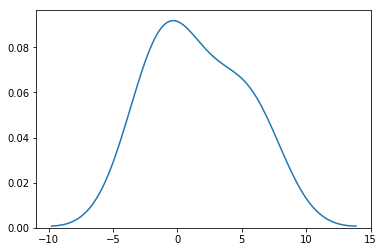

In [18]:
sns.kdeplot(data, kernel='gau')

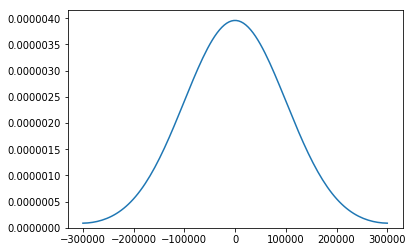

In [28]:
sns.kdeplot(data, kernel='gau', bw=100000)
# bw duże tzn każdy punkt rozmyty tak samo dużo, więc wszystkie punkty takie same -> OVERFITTING

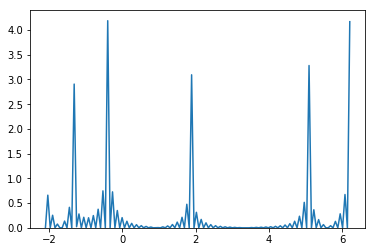

In [29]:
sns.kdeplot(data, kernel='gau', bw=0.0000001)
# bw małe tzn każdy punkt niemal nie rozmyty, więc wszystkie punkty różne -> UNDERFITTING

# Zadanie 2
Ustal szerokość okna $h$ za pomocą stałej Silvermana:
$$h = \left(\frac{4\hat{\sigma}^5}{3n}\right)^{\frac{1}{5}} \approx 1.06 \hat{\sigma} n^{-1/5},$$
gdzie $\sigma$ jest odchyleniem standardowym. 

In [31]:
n = data.size
print('n = ', n)
# pow(x,y) = x^y = x**y
h = 1.06 * np.std(data) * (n**(-0.2))
print('h = ', h)

n =  6
h =  2.334526612824365


# Zadanie 3
Wygeneruj estymację gęstości za pomocą jądra będącego gęstością rozkładu jednostajnego.

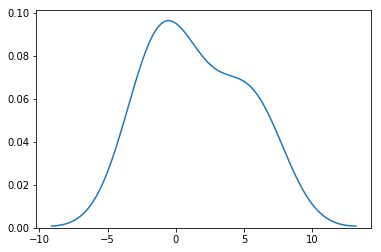

In [32]:
# użycie stałej Silvermana
sns.kdeplot(data, kernel='gau', bw=h)
plt.show()